In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data() #LoadingMnist

# The MNIST dataset is a benchmark dataset in machine learning and computer vision.
# It consists of 70,000 grayscale images of handwritten digits (0-9), each of size 28x28 pixels.

# Data endpoints:
# x_train_full: Array of training images. Shape: (60000, 28, 28)
# y_train_full: Array of training labels. Shape: (60000,)
# x_test: Array of test images. Shape: (10000, 28, 28)
# y_test: Array of test labels. Shape: (10000,)

# The dataset is split into two parts:
# 1. Training set (x_train_full, y_train_full): Contains 60,000 images and their corresponding labels.
# 2. Test set (x_test, y_test): Contains 10,000 images and their corresponding labels.

# Optimization:
# - The MNIST dataset is well-optimized for initial training and evaluation of machine learning models.
# - It is small enough to be loaded into memory and processed on most modern hardware.
# - The dataset is pre-shuffled, ensuring that training and testing sets are representative and unbiased.

# Usefulness:
# - The MNIST dataset serves as an excellent introductory dataset for image classification tasks.
# - Due to its simplicity and well-structured nature, it is often used for benchmarking algorithms.
# - It is a common starting point for learning and experimenting with neural networks and deep learning.
# - The dataset's consistency and simplicity make it ideal for quick prototyping and testing of new ideas and algorithms.
# - While it is relatively simple for modern models, MNIST helps in understanding the basics of data preprocessing, model building, and evaluation in machine learning.

# Note: As the MNIST dataset is somewhat outdated for state-of-the-art deep learning models, more complex datasets like CIFAR-10, CIFAR-100, or ImageNet are used for advanced research and development.



x_train_full = x_train_full.astype('float32') / 255.0  #normalizing the data
x_test = x_test.astype('float32') / 255.0
x_train, x_valid = x_train_full[:50000], x_train_full[50000:] # Spilting the full training sets into testing and validation
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]
x_train = x_train.reshape(-1, 28, 28, 1) #reshaping the data
x_valid = x_valid.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, 10)#one-hot encoding
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
from tensorflow.keras import models, layers

# Define the LeNet-5 model using Sequential API
model = models.Sequential([
    # First Convolutional Layer:
    # - Applies 6 convolutional filters of size 5x5
    # - Activation function: ReLU (Rectified Linear Unit)
    # - Input shape is (28, 28, 1), indicating grayscale images of size 28x28 pixels
    layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),

    # First Average Pooling Layer:
    # - Applies average pooling operation to reduce the spatial dimensions (downsampling)
    layers.AveragePooling2D(),

    # Second Convolutional Layer:
    # - Applies 16 convolutional filters of size 5x5
    # - Activation function: ReLU
    layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),

    # Second Average Pooling Layer:
    # - Applies average pooling operation to further reduce the spatial dimensions
    layers.AveragePooling2D(),

    # Flatten Layer:
    # - Flattens the input (converts 2D matrix to 1D vector) to prepare for fully connected layers
    layers.Flatten(),

    # First Fully Connected (Dense) Layer:
    # - Contains 120 neurons
    # - Activation function: ReLU
    layers.Dense(120, activation='relu'),

    # Second Fully Connected (Dense) Layer:
    # - Contains 84 neurons
    # - Activation function: ReLU
    layers.Dense(84, activation='relu'),

    # Output Layer:
    # - Contains 10 neurons (one for each digit class, 0-9)
    # - Activation function: Softmax (to output probabilities for each class)
    layers.Dense(10, activation='softmax')
])

# Explanation:
# The LeNet-5 model is a pioneering convolutional neural network (CNN) architecture designed for handwritten digit recognition.
# It consists of the following layers:
# - Convolutional Layers: Extract features from input images by applying convolutional filters. ReLU is used for non-linear activation.
# - Average Pooling Layers: Reduce the spatial dimensions of the feature maps, which helps in reducing the computational complexity.
# - Flatten Layer: Converts the 2D feature maps into a 1D vector, preparing it for fully connected layers.
# - Fully Connected (Dense) Layers: Learn to classify the features extracted by the convolutional layers. ReLU activation introduces non-linearity.
# - Output Layer: Produces the final classification output using Softmax activation, which provides the probability distribution over the 10 digit classes.

# LeNet-5 was one of the first successful applications of CNNs and paved the way for deeper and more complex neural network architectures.


In [12]:
'''
 Explanation:
 Compiling a model configures it for training. During compilation, the model's optimizer, loss function, and evaluation metrics are specified.
 - Optimizer: Controls the learning rate and how the model updates its weights. 'adam' is widely used for its efficiency and ability to handle sparse gradients.
 - Loss function: A measure of how well the model's predictions match the true labels. 'categorical_crossentropy' is ideal for classification tasks with multiple classes.
 - Metrics: Metrics are used to evaluate the model's performance. 'accuracy' is a straightforward and intuitive metric for classification models, representing the ratio of correct predictions to total predictions.
'''


# Compiling LeNet-5
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# Training the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_valid, y_valid))


Epoch 1/10
391/391 [==============================] - 21s 43ms/step - loss: 0.4320 - accuracy: 0.8719 - val_loss: 0.1386 - val_accuracy: 0.9616
Epoch 2/10
391/391 [==============================] - 17s 44ms/step - loss: 0.1218 - accuracy: 0.9631 - val_loss: 0.0943 - val_accuracy: 0.9742
Epoch 3/10
391/391 [==============================] - 17s 43ms/step - loss: 0.0844 - accuracy: 0.9745 - val_loss: 0.0736 - val_accuracy: 0.9802
Epoch 4/10
391/391 [==============================] - 19s 49ms/step - loss: 0.0675 - accuracy: 0.9784 - val_loss: 0.0637 - val_accuracy: 0.9828
Epoch 5/10
391/391 [==============================] - 17s 43ms/step - loss: 0.0567 - accuracy: 0.9822 - val_loss: 0.0580 - val_accuracy: 0.9837
Epoch 6/10
391/391 [==============================] - 17s 44ms/step - loss: 0.0488 - accuracy: 0.9847 - val_loss: 0.0581 - val_accuracy: 0.9832
Epoch 7/10
391/391 [==============================] - 19s 49ms/step - loss: 0.0428 - accuracy: 0.9867 - val_loss: 0.0549 - val_accuracy:

In [7]:
# Evaluating
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 2s 5ms/step - loss: 0.0358 - accuracy: 0.9889
Test accuracy: 0.9889000058174133


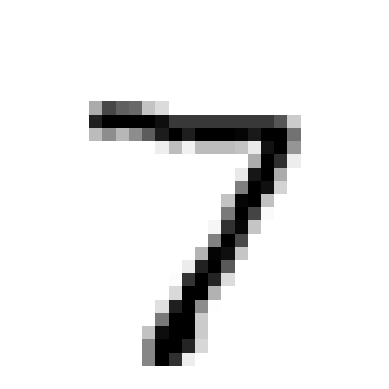

In [8]:
# Displaying the data
some_digit = x_test[0].reshape(28, 28)
plt.imshow(some_digit, cmap=plt.cm.binary)
plt.axis("off")
plt.show()



1/1 [==============================] - 0s 21ms/step


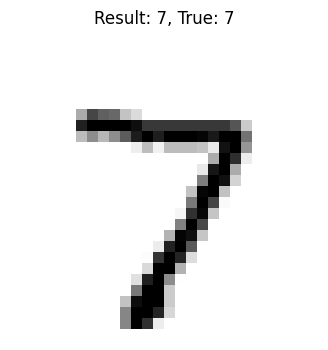

1/1 [==============================] - 0s 21ms/step


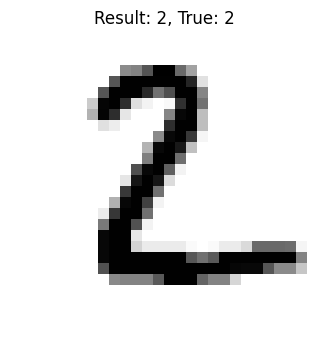

1/1 [==============================] - 0s 23ms/step


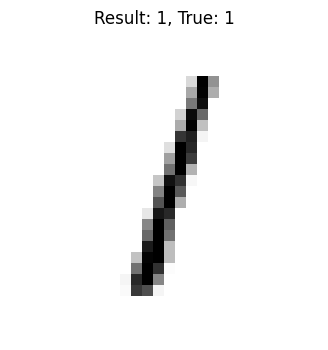

1/1 [==============================] - 0s 25ms/step


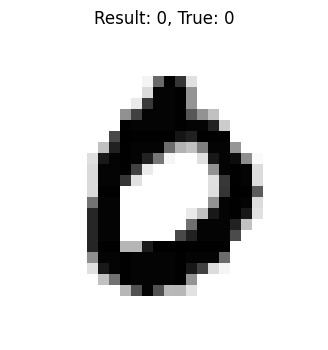

1/1 [==============================] - 0s 23ms/step


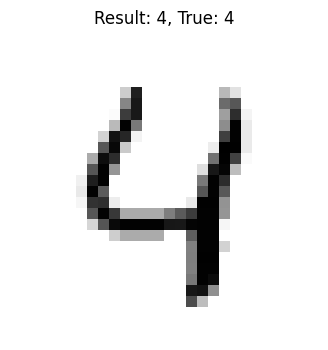

1/1 [==============================] - 0s 23ms/step


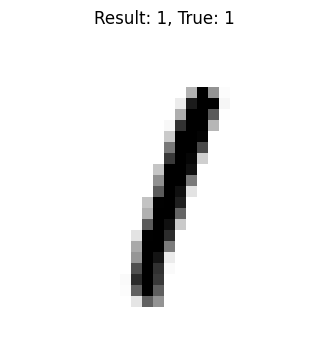

1/1 [==============================] - 0s 21ms/step


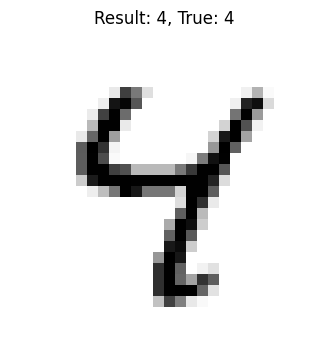

1/1 [==============================] - 0s 20ms/step


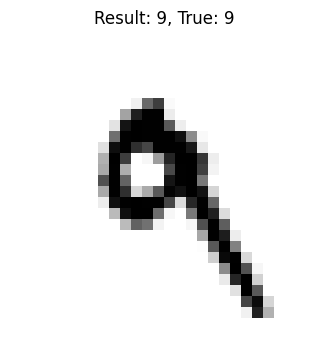

1/1 [==============================] - 0s 22ms/step


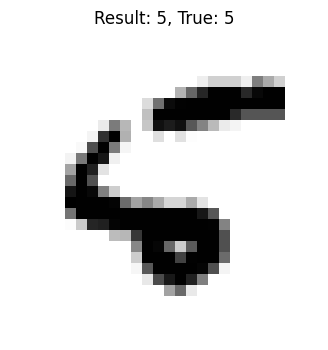

1/1 [==============================] - 0s 21ms/step


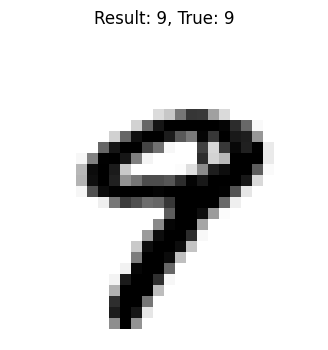

In [17]:
 """
    Display predictions for a given number of test samples.

    Args:
    - model: Trained Keras model to make predictions.
    - x_test: Test images, numpy array of shape (num_samples, 28, 28, 1).
    - y_test: True labels for the test images, one-hot encoded, numpy array of shape (num_samples, 10).
    - num_samples: Number of samples to display predictions for (default is 10).
 """

# trying to predicit the model

def display_predictions(model, x_test, y_test, num_samples=10):

    for i in range(num_samples):
        plt.figure(figsize=(4, 4)) # Creating a new figure for each sample
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)# Displaying the test image
        plt.axis('off')# Hiding the axis
        prediction = model.predict(x_test[i].reshape(1, 28, 28, 1)) # predicting for the current test image
        predicted_label = np.argmax(prediction) # Getting the predicted label (index of the highest probability)
        true_label = np.argmax(y_test[i]) # Getting the true label (index of the highest value in the one-hot encoded label)
        plt.title(f'Result: {predicted_label}, True: {true_label}')  # Setting the title of the plot with the predicted and true labels
        plt.show()

#number of samples
display_predictions(model, x_test, y_test, num_samples=10)